<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>

<h1 align="center"><font size="5">Classification with Python</font></h1>


In this notebook we try to practice all the classification algorithms that we have learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Let's first load required libraries:


In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline
print("Done")

Done


In [96]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
print("Done")

Done


### About dataset


This dataset is about past loans. The **Loan_train.csv** data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
| -------------- | ------------------------------------------------------------------------------------- |
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |


Let's download the dataset


In [3]:
!wget -O loan_train.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv

--2021-10-22 04:34:37--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.45.118.108
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.45.118.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

loan_train.csv      100%[===================>]  22.56K  --.-KB/s    in 0s      

2021-10-22 04:34:38 (74.6 MB/s) - ‘loan_train.csv’ saved [23101/23101]



### Load Data From CSV File


In [2]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [3]:
df.shape

(346, 10)

### Convert to date time object


In [4]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing


Let’s see how many of each class is in our data set


In [5]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection


Let's plot some columns to underestand data better:


In [6]:
# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y


NotWritableError: The current user does not have write permissions to a required path.
  path: /home/jupyter-jupadmin/.conda/pkgs/urls.txt
  uid: 1001
  gid: 1003

If you feel that permissions on this path are set incorrectly, you can manually
change them by executing

  $ sudo chown 1001:1003 /home/jupyter-jupadmin/.conda/pkgs/urls.txt

In general, it's not advisable to use 'sudo conda'.




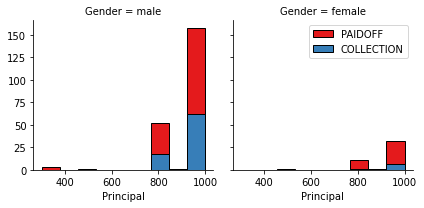

In [7]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

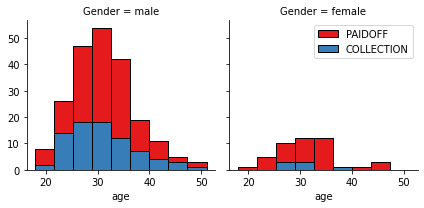

In [8]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction


### Let's look at the day of the week people get the loan


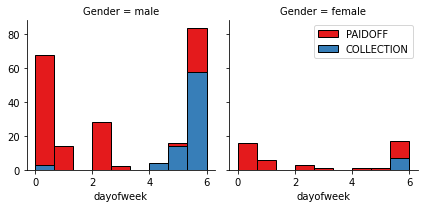

In [9]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that people who get the loan at the end of the week don't pay it off, so let's use Feature binarization to set a threshold value less than day 4


In [10]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values


Let's look at gender:


In [11]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Let's convert male to 0 and female to 1:


In [12]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding

#### How about education?


In [13]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Features before One Hot Encoding


In [14]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame


In [15]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Feature Selection


Let's define feature sets, X:


In [16]:
Feature.columns

Index(['Principal', 'terms', 'age', 'Gender', 'weekend', 'Bechalor',
       'High School or Below', 'college'],
      dtype='object')

In [17]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


What are our lables?


In [18]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [19]:
y = df['loan_status']
y

0         PAIDOFF
1         PAIDOFF
2         PAIDOFF
3         PAIDOFF
4         PAIDOFF
          ...    
341    COLLECTION
342    COLLECTION
343    COLLECTION
344    COLLECTION
345    COLLECTION
Name: loan_status, Length: 346, dtype: object

## Normalize Data


Data Standardization give data zero mean and unit variance (technically should be done after train test split)


In [20]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

# Classification


Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:

*   K Nearest Neighbor(KNN)
*   Decision Tree
*   Support Vector Machine
*   Logistic Regression

\__ Notice:\__

*   You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
*   You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
*   You should include the code of the algorithm in the following cells.


# K Nearest Neighbor(KNN)

Notice: You should find the best k to build the model with the best accuracy.\
**warning:** You should not use the **loan_test.csv** for finding the best k, however, you can split your train_loan.csv into train and test to find the best **k**.


In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [182]:
##  Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)


Train set: (276, 8) (276,)
Test set: (70, 8) (70,)


In [183]:
##  We are going to store the results of each model for easier review at the end
model_results = pd.DataFrame(columns=['Algo','Factor','Accuracy_Test','Accuracy_Train','Jaccard','F1Score','LogLoss'])
model_results


,Algo,Factor,Accuracy_Test,Accuracy_Train,Jaccard,F1Score,LogLoss


In [184]:
##  Training
##  Get KNN results for K = {1:10}

Ks = 10
## ??
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for i in range(1,Ks):
    # Train model and predict
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train, y_train)
    yhat=neigh.predict(X_test)
    
    ##  ??  from W3 - 0104
    mean_acc[i-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[i-1] = np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
    
    # Log the results
    algo_name = 'KNN'
    # i = i
    clf = neigh
    newrow = {
        'Algo' : 'KNN' 
        , 'Factor' : i
        , 'Accuracy_Test' :  neigh.score(X_test, y_test) 
        , 'Accuracy_Train': neigh.score(X_train, y_train)
        , 'Jaccard' : jaccard_score(y_test, yhat, pos_label='PAIDOFF')
        , 'F1Score' : f1_score(y_test, yhat, pos_label='PAIDOFF')
        , 'LogLoss' : 'N/A'
    }
    model_results = model_results.append(newrow, ignore_index=True)
mean_acc
    

array([0.67, 0.66, 0.71, 0.69, 0.76, 0.71, 0.79, 0.76, 0.76])

In [185]:
std_acc

array([0.06, 0.06, 0.05, 0.06, 0.05, 0.05, 0.05, 0.05, 0.05])

In [186]:
model_results

,Algo,Factor,Accuracy_Test,Accuracy_Train,Jaccard,F1Score,LogLoss
0,KNN,1,0.671429,0.894928,0.640625,0.780952,N/A
1,KNN,2,0.657143,0.822464,0.593220,0.744681,N/A
2,KNN,3,0.714286,0.833333,0.692308,0.818182,N/A
3,KNN,4,0.685714,0.815217,0.639344,0.780000,N/A
4,KNN,5,0.757143,0.815217,0.734375,0.846847,N/A
5,KNN,6,0.714286,0.800725,0.682540,0.811321,N/A
6,KNN,7,0.785714,0.807971,0.765625,0.867257,N/A
7,KNN,8,0.757143,0.797101,0.725806,0.841121,N/A
8,KNN,9,0.757143,0.789855,0.738462,0.849558,N/A


In [187]:
####  Get the best score  ####

##  This did not work at all
# model_results.loc[(model_results['Accuracy_Test'].idxmax()) & (model_results['Algo']=='KNN')]

if 1==0:
    ## Original method trying to figure out how to filter and get max score ('Accuracy_Test')
    fKNN = model_results['Algo']=='KNN'
    KNN_df = model_results[fKNN]
    best = KNN_df.loc[KNN_df['Accuracy_Test'].idxmax()]
    print(best)
else:
    ##  Built by chaining the above together into one line
    print('Best result is : \n', model_results.loc[model_results[model_results['Algo']=='KNN']['Accuracy_Test'].idxmax()])

Best result is : 
 Algo                   KNN
Factor                   7
Accuracy_Test     0.785714
Accuracy_Train    0.807971
Jaccard           0.765625
F1Score           0.867257
LogLoss                N/A
Name: 6, dtype: object


#### Plot the model accuracy for a different number of neighbors.

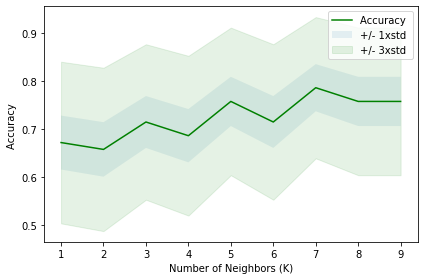

In [188]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [189]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.7857142857142857 with k= 7


### END KNN
--- 

# Decision Tree


In [190]:
from sklearn.tree import DecisionTreeClassifier

In [191]:
print('Shape of X training set {}'.format(X_train.shape),'&',' Size of Y training set {}'.format(y_train.shape))

Shape of X training set (276, 8) &  Size of Y training set (276,)


In [192]:
print('Shape of X training set {}'.format(X_test.shape),'&',' Size of Y training set {}'.format(y_test.shape))

Shape of X training set (70, 8) &  Size of Y training set (70,)


### Modeling

In [193]:
loanTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
loanTree

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [194]:
loanTree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

### Prediction

In [195]:
##  PREDICTION
yhat = loanTree.predict(X_test)

In [196]:
print (predictTree [0:5])
print (y_test [0:5])

['COLLECTION' 'COLLECTION' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']
63     PAIDOFF
34     PAIDOFF
186    PAIDOFF
146    PAIDOFF
130    PAIDOFF
Name: loan_status, dtype: object


In [197]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, yhat))

DecisionTrees's Accuracy:  0.6142857142857143


In [198]:
# Log the results
algo_name = 'Decision Tree'
i = 0
clf = loanTree
newrow = {
    'Algo' : algo_name 
    , 'Factor' : i
    , 'Accuracy_Test' :  clf.score(X_test, y_test) 
    , 'Accuracy_Train': clf.score(X_train, y_train)
    , 'Jaccard' : jaccard_score(y_test, yhat, pos_label='PAIDOFF')
    , 'F1Score' : f1_score(y_test, yhat, pos_label='PAIDOFF')
    , 'LogLoss' : 'N/A'
}
model_results = model_results.append(newrow, ignore_index=True)

In [199]:
model_results[model_results['Algo']=='Decision Tree']

,Algo,Factor,Accuracy_Test,Accuracy_Train,Jaccard,F1Score,LogLoss
9,Decision Tree,0,0.614286,0.746377,0.571429,0.727273,N/A


In [201]:
####  Additional Decision Tree method
####  run multiple iteratations because we can get slightly different results each iteration
####  we will take the average of those iterations

steps = 10000
mean_acc = np.zeros(steps - 1)
score_test = np.zeros(steps - 1)
score_train = np.zeros(steps - 1)
i = 0

for i in range(steps):
    loanTree.fit(X_train, y_train)
    yhat = loanTree.predict(X_test)
    mean_acc[i - 1] = metrics.accuracy_score(y_test, yhat)
    score_test[i - 1] = loanTree.score(X_test, y_test)
    score_train[i - 1] = loanTree.score(X_train, y_train)
    
    
    
# Log the results
algo_name = 'Decision Tree - Multi Iteration'
#i = 0
clf = loanTree
newrow = {
    'Algo' : algo_name 
    , 'Factor' : i
    , 'Accuracy_Test' :  np.mean(score_test)  #clf.score(X_test, y_test) 
    , 'Accuracy_Train': np.mean(score_train)  #clf.score(X_train, y_train)
    , 'Jaccard' : jaccard_score(y_test, yhat, pos_label='PAIDOFF')
    , 'F1Score' : f1_score(y_test, yhat, pos_label='PAIDOFF')
    , 'LogLoss' : 'N/A'
}
model_results = model_results.append(newrow, ignore_index=True)

In [202]:
model_results[model_results['Algo']=='Decision Tree - Multi Iteration']

,Algo,Factor,Accuracy_Test,Accuracy_Train,Jaccard,F1Score,LogLoss
10,Decision Tree - Multi Iteration,9999,0.614286,0.746377,0.571429,0.727273,N/A


### Evaluation


In [203]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predictTree))

DecisionTrees's Accuracy:  0.6142857142857143


In [204]:
from  io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

In [206]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'loan_status', 'Principal', 'terms',
       'effective_date', 'due_date', 'age', 'education', 'Gender', 'dayofweek',
       'weekend'],
      dtype='object')

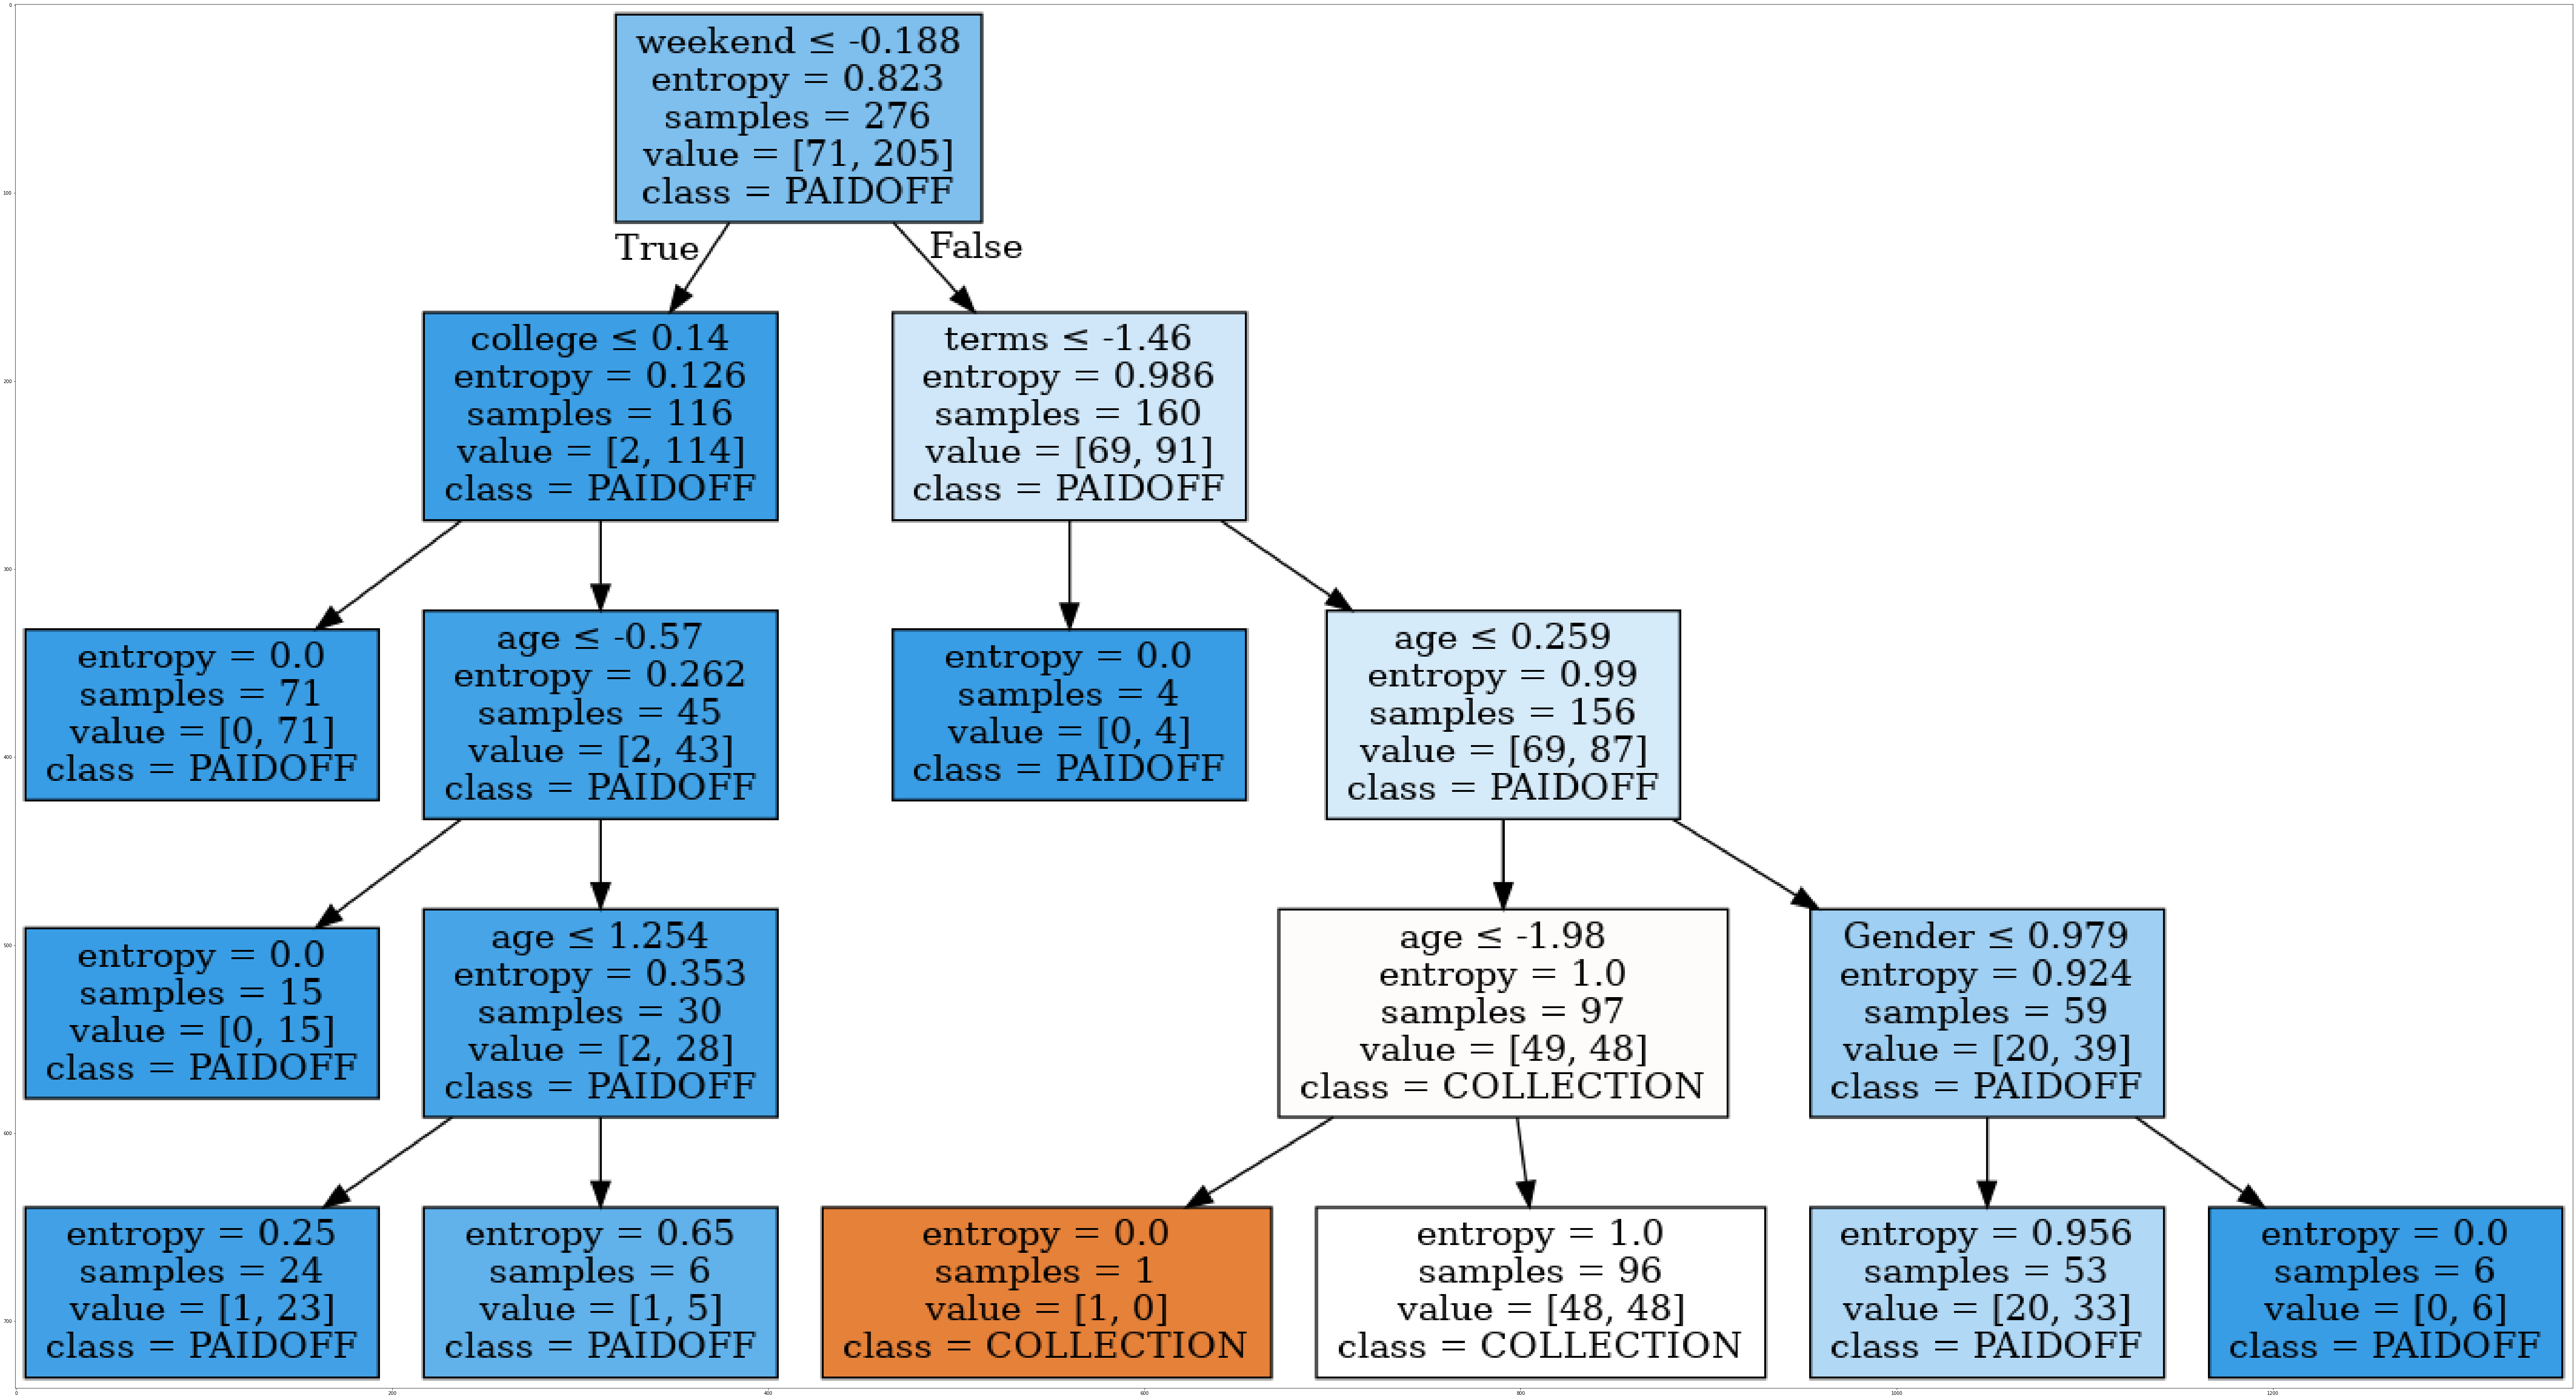

In [207]:
dot_data = StringIO()
filename = "loantree.png"
#featureNames = df.columns[3:12]
featureNames = Feature.columns
out=tree.export_graphviz(loanTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_train), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

### END - Decision Tree
--- 

# Support Vector Machine


In [208]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline 
import matplotlib.pyplot as plt
from sklearn import svm
#  ---  Evaluation
from sklearn.metrics import classification_report, confusion_matrix
import itertools
print("Done")

Done


In [209]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (276, 8) (276,)
Test set: (70, 8) (70,)


In [210]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [251]:
####  RBF
svm_rbf = svm.SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train) 

SVC()

In [252]:
yhat = svm_rbf.predict(X_test)
yhat [0:5]

array(['COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [213]:
# Log the results
algo_name = 'SVM - RBF'
i = 0
clf = svm_rbf
newrow = {
    'Algo' : algo_name 
    , 'Factor' : i
    , 'Accuracy_Test' :  clf.score(X_test, y_test) 
    , 'Accuracy_Train': clf.score(X_train, y_train)
    , 'Jaccard' : jaccard_score(y_test, yhat, pos_label='PAIDOFF')
    , 'F1Score' : f1_score(y_test, yhat, pos_label='PAIDOFF')
    , 'LogLoss' : 'N/A'
}
model_results = model_results.append(newrow, ignore_index=True)
model_results[model_results['Algo']==algo_name]

,Algo,Factor,Accuracy_Test,Accuracy_Train,Jaccard,F1Score,LogLoss
11,SVM - RBF,0,0.742857,0.782609,0.727273,0.842105,N/A


In [253]:
yhat_df = pd.DataFrame(yhat)
print(yhat_df.value_counts())
y_test_df = pd.DataFrame(y_test)
print(y_test_df.value_counts())

PAIDOFF       59
COLLECTION    11
dtype: int64
loan_status
PAIDOFF        55
COLLECTION     15
dtype: int64


              precision    recall  f1-score   support

  COLLECTION       0.36      0.27      0.31        15
     PAIDOFF       0.81      0.87      0.84        55

    accuracy                           0.74        70
   macro avg       0.59      0.57      0.57        70
weighted avg       0.72      0.74      0.73        70

Confusion matrix, without normalization
[[ 4 11]
 [ 7 48]]


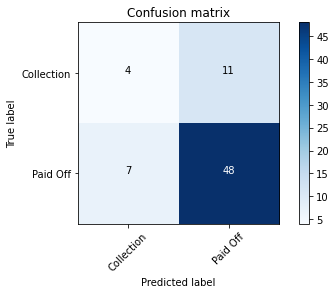

In [254]:
# Compute confusion matrix
#cnf_matrix = confusion_matrix(y_test, yhat, labels=[2,4])
np.set_printoptions(precision=2)


print (classification_report(y_test, yhat))
cnf_matrix = confusion_matrix(y_test, yhat)#, labels=[2,4])


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Collection','Paid Off'],normalize= False,  title='Confusion matrix')
#plot_confusion_matrix(cnf_matrix, normalize= False,  title='Confusion matrix')

In [255]:
####  Linear
svm_linear = svm.SVC(kernel='linear')
svm_linear.fit(X_train, y_train) 

yhat = svm_linear.predict(X_test)
yhat [0:5]


array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [220]:
# Log the results
algo_name = 'SVM - Linear'
i = 0
clf = svm_linear
newrow = {
    'Algo' : algo_name 
    , 'Factor' : i
    , 'Accuracy_Test' :  clf.score(X_test, y_test) 
    , 'Accuracy_Train': clf.score(X_train, y_train)
    , 'Jaccard' : jaccard_score(y_test, yhat, pos_label='PAIDOFF')
    , 'F1Score' : f1_score(y_test, yhat, pos_label='PAIDOFF')
    , 'LogLoss' : 'N/A'
}
model_results = model_results.append(newrow, ignore_index=True)
model_results[model_results['Algo']==algo_name]

,Algo,Factor,Accuracy_Test,Accuracy_Train,Jaccard,F1Score,LogLoss
12,SVM - Linear,0,0.785714,0.742754,0.785714,0.88,N/A


/opt/tljh/user/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/tljh/user/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/tljh/user/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

  COLLECTION       0.00      0.00      0.00        15
     PAIDOFF       0.79      1.00      0.88        55

    accuracy                           0.79        70
   macro avg       0.39      0.50      0.44        70
weighted avg       0.62      0.79      0.69        70

Confusion matrix, without normalization
[[ 0 15]
 [ 0 55]]


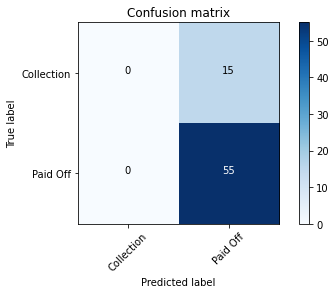

In [256]:
# Compute confusion matrix
#cnf_matrix = confusion_matrix(y_test, yhat, labels=[2,4])
np.set_printoptions(precision=2)


print (classification_report(y_test, yhat))
cnf_matrix = confusion_matrix(y_test, yhat)#, labels=[2,4])


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Collection','Paid Off'],normalize= False,  title='Confusion matrix')
#plot_confusion_matrix(cnf_matrix, normalize= False,  title='Confusion matrix')

In [257]:
####  Polynomial
svm_poly = svm.SVC(kernel='poly')
svm_poly.fit(X_train, y_train) 

yhat = svm_poly.predict(X_test)
yhat [0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [223]:
# Log the results
algo_name = 'SVM - Polynomial'
i = 0
clf = svm_poly
newrow = {
    'Algo' : algo_name 
    , 'Factor' : i
    , 'Accuracy_Test' :  clf.score(X_test, y_test) 
    , 'Accuracy_Train': clf.score(X_train, y_train)
    , 'Jaccard' : jaccard_score(y_test, yhat, pos_label='PAIDOFF')
    , 'F1Score' : f1_score(y_test, yhat, pos_label='PAIDOFF')
    , 'LogLoss' : 'N/A'
}
model_results = model_results.append(newrow, ignore_index=True)
model_results[model_results['Algo']==algo_name]

,Algo,Factor,Accuracy_Test,Accuracy_Train,Jaccard,F1Score,LogLoss
13,SVM - Polynomial,0,0.771429,0.782609,0.768116,0.868852,N/A


              precision    recall  f1-score   support

  COLLECTION       0.33      0.07      0.11        15
     PAIDOFF       0.79      0.96      0.87        55

    accuracy                           0.77        70
   macro avg       0.56      0.52      0.49        70
weighted avg       0.69      0.77      0.71        70

Confusion matrix, without normalization
[[ 1 14]
 [ 2 53]]


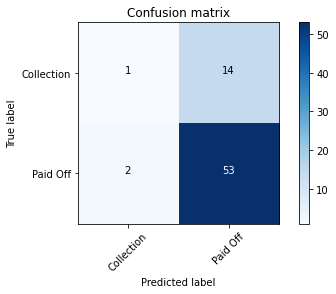

In [258]:
# Compute confusion matrix
#cnf_matrix = confusion_matrix(y_test, yhat, labels=[2,4])
np.set_printoptions(precision=2)


print (classification_report(y_test, yhat))
cnf_matrix = confusion_matrix(y_test, yhat)#, labels=[2,4])


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Collection','Paid Off'],normalize= False,  title='Confusion matrix')
#plot_confusion_matrix(cnf_matrix, normalize= False,  title='Confusion matrix')

In [259]:
####  VERIFY
yhat_df = pd.DataFrame(yhat)
print(yhat_df.value_counts())
y_test_df = pd.DataFrame(y_test)
print(y_test_df.value_counts())

PAIDOFF       67
COLLECTION     3
dtype: int64
loan_status
PAIDOFF        55
COLLECTION     15
dtype: int64


In [260]:
####  Sigmoid
svm_sigmoid = svm.SVC(kernel='sigmoid')
svm_sigmoid.fit(X_train, y_train) 

yhat = svm_sigmoid.predict(X_test)
yhat [0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [227]:
# Log the results
algo_name = 'SVM - Sigmoid'
i = 0
clf = svm_sigmoid
newrow = {
    'Algo' : algo_name 
    , 'Factor' : i
    , 'Accuracy_Test' :  clf.score(X_test, y_test) 
    , 'Accuracy_Train': clf.score(X_train, y_train)
    , 'Jaccard' : jaccard_score(y_test, yhat, pos_label='PAIDOFF')
    , 'F1Score' : f1_score(y_test, yhat, pos_label='PAIDOFF')
    , 'LogLoss' : 'N/A'
}
model_results = model_results.append(newrow, ignore_index=True)
model_results[model_results['Algo']==algo_name]

,Algo,Factor,Accuracy_Test,Accuracy_Train,Jaccard,F1Score,LogLoss
14,SVM - Sigmoid,0,0.742857,0.710145,0.73913,0.85,N/A


              precision    recall  f1-score   support

  COLLECTION       0.20      0.07      0.10        15
     PAIDOFF       0.78      0.93      0.85        55

    accuracy                           0.74        70
   macro avg       0.49      0.50      0.48        70
weighted avg       0.66      0.74      0.69        70

Confusion matrix, without normalization
[[ 1 14]
 [ 4 51]]


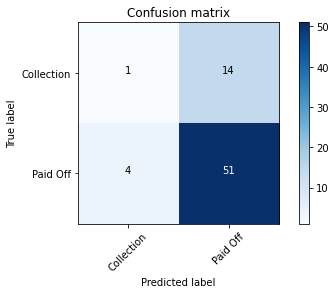

In [261]:
# Compute confusion matrix
#cnf_matrix = confusion_matrix(y_test, yhat, labels=[2,4])
np.set_printoptions(precision=2)


print (classification_report(y_test, yhat))
cnf_matrix = confusion_matrix(y_test, yhat)#, labels=[2,4])


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Collection','Paid Off'],normalize= False,  title='Confusion matrix')
#plot_confusion_matrix(cnf_matrix, normalize= False,  title='Confusion matrix')

In [231]:
# Log the results
#algo_name = 'SVM - Precomputed (not performed)'
#newrow = {'Algo' : algo_name , 'Factor' : 0, 'Accuracy_Test' :  0 , 'Accuracy_Train': 0}
#model_results = model_results.append(newrow, ignore_index=True)
#model_results[model_results['Algo']==algo_name]

# Log the results
algo_name = 'SVM - Precomputed (not performed)'
i = 0
#clf = neigh
newrow = {
    'Algo' : algo_name 
    , 'Factor' : i
    , 'Accuracy_Test' :  np.nan #clf.score(X_test, y_test) 
    , 'Accuracy_Train': np.nan  #clf.score(X_train, y_train)
    , 'Jaccard' : np.nan  #jaccard_score(y_test, yhat, pos_label='PAIDOFF')
    , 'F1Score' : np.nan  #f1_score(y_test, yhat, pos_label='PAIDOFF')
    , 'LogLoss' : 'N/A'
}
model_results = model_results.append(newrow, ignore_index=True)
model_results[model_results['Algo']==algo_name]

,Algo,Factor,Accuracy_Test,Accuracy_Train,Jaccard,F1Score,LogLoss
15,SVM - Precomputed (not performed),0,NaN,NaN,NaN,NaN,N/A


# Logistic Regression


In [232]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [233]:
yhat = LR.predict(X_test)
yhat

array(['COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'COLLECTION', 'PAIDOFF', 'COLLECTION', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'COLLECTION',
       'COLLECTION', 'PAIDOFF', 'COLLECTION', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'COLLECTION',
       'PAIDOFF', 'PAIDOFF', 'COLLECTION', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF'], dtype=object)

In [234]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.5 , 0.5 ],
       [0.45, 0.55],
       [0.31, 0.69],
       [0.34, 0.66],
       [0.32, 0.68],
       [0.32, 0.68],
       [0.49, 0.51],
       [0.48, 0.52],
       [0.34, 0.66],
       [0.49, 0.51],
       [0.34, 0.66],
       [0.5 , 0.5 ],
       [0.25, 0.75],
       [0.34, 0.66],
       [0.44, 0.56],
       [0.26, 0.74],
       [0.52, 0.48],
       [0.3 , 0.7 ],
       [0.5 , 0.5 ],
       [0.32, 0.68],
       [0.44, 0.56],
       [0.49, 0.51],
       [0.51, 0.49],
       [0.47, 0.53],
       [0.41, 0.59],
       [0.51, 0.49],
       [0.51, 0.49],
       [0.37, 0.63],
       [0.5 , 0.5 ],
       [0.25, 0.75],
       [0.47, 0.53],
       [0.46, 0.54],
       [0.46, 0.54],
       [0.48, 0.52],
       [0.39, 0.61],
       [0.46, 0.54],
       [0.5 , 0.5 ],
       [0.29, 0.71],
       [0.46, 0.54],
       [0.45, 0.55],
       [0.51, 0.49],
       [0.32, 0.68],
       [0.45, 0.55],
       [0.51, 0.49],
       [0.31, 0.69],
       [0.5 , 0.5 ],
       [0.47, 0.53],
       [0.5 ,

In [235]:
# Log the results
algo_name = 'Logistic Regression'
i = 0
clf = LR
newrow = {
    'Algo' : algo_name 
    , 'Factor' : i
    , 'Accuracy_Test' :  clf.score(X_test, y_test) 
    , 'Accuracy_Train': clf.score(X_train, y_train)
    , 'Jaccard' : jaccard_score(y_test, yhat, pos_label='PAIDOFF')
    , 'F1Score' : f1_score(y_test, yhat, pos_label='PAIDOFF')
    , 'LogLoss' : 'N/A'
}
model_results = model_results.append(newrow, ignore_index=True)

model_results[model_results['Algo']==algo_name]

,Algo,Factor,Accuracy_Test,Accuracy_Train,Jaccard,F1Score,LogLoss
16,Logistic Regression,0,0.685714,0.757246,0.676471,0.807018,N/A


# Model Evaluation using Test set


In [294]:
##  MOVED TO TOP to allow use in earlier code
#from sklearn.metrics import jaccard_score
#from sklearn.metrics import f1_score
#from sklearn.metrics import log_loss


First, download and load the test set:


In [278]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2021-10-22 09:29:59--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

loan_test.csv       100%[===================>]   3.56K  --.-KB/s    in 0s      

2021-10-22 09:29:59 (482 MB/s) - ‘loan_test.csv’ saved [3642/3642]



### Load Test set for evaluation


In [278]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [279]:
####  Preprocessing  ####
##  We need to do the same preprocessing, data wrangling as we did for the test-train dataset

##  Convert to date time object
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])

##  Day of week flags
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)

##  Convert Categorical features to numerical values
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)


##  Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame
Feature = test_df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(test_df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,50,1,0,1,0,0
1,300,7,35,0,1,0,0,0
2,1000,30,43,1,1,0,1,0
3,1000,30,26,0,1,0,0,1
4,800,15,29,0,1,1,0,0


In [280]:
Feature.shape

(54, 8)

In [281]:
##  Set our variables
Test_X = Feature
Test_Y = test_df['loan_status'].values

##  Normalize the data
Test_X = preprocessing.StandardScaler().fit(Test_X).transform(Test_X)
Test_X[0:5]

array([[ 0.49,  0.93,  3.06,  1.98, -1.3 ,  2.4 , -0.8 , -0.86],
       [-3.56, -1.7 ,  0.53, -0.51,  0.77, -0.42, -0.8 , -0.86],
       [ 0.49,  0.93,  1.88,  1.98,  0.77, -0.42,  1.25, -0.86],
       [ 0.49,  0.93, -0.98, -0.51,  0.77, -0.42, -0.8 ,  1.16],
       [-0.67, -0.79, -0.48, -0.51,  0.77,  2.4 , -0.8 , -0.86]])

In [282]:
####  Review our model results
model_results

,Algo,Factor,Accuracy_Test,Accuracy_Train,Jaccard,F1Score,LogLoss
0,KNN,1,0.671429,0.894928,0.640625,0.780952,N/A
1,KNN,2,0.657143,0.822464,0.593220,0.744681,N/A
2,KNN,3,0.714286,0.833333,0.692308,0.818182,N/A
3,KNN,4,0.685714,0.815217,0.639344,0.780000,N/A
4,KNN,5,0.757143,0.815217,0.734375,0.846847,N/A
5,KNN,6,0.714286,0.800725,0.682540,0.811321,N/A
6,KNN,7,0.785714,0.807971,0.765625,0.867257,N/A
7,KNN,8,0.757143,0.797101,0.725806,0.841121,N/A
8,KNN,9,0.757143,0.789855,0.738462,0.849558,N/A
9,Decision Tree,0,0.614286,0.746377,0.571429,0.727273,N/A


In [283]:
print('Shape X :', Test_X.shape)
print('Shape Y :', Test_Y.shape)

Shape X : (54, 8)
Shape Y : (54,)


In [291]:
####  Create new predictions using the new Test data and the models created earlier.
####  Using the best where applicable (i.e., KNN use with K=7)

##  This is where we are going to store the scores for each algo
test_results = pd.DataFrame(columns=['Algo', 'Jaccard','F1Score','LogLoss'])

##  predict and log each of the results
##  Have to Retrain the KNN model using the best n_neighbors of 7
##  YEAH YEAH I know, redundant code that should be refactored out to a separate function
neigh = KNeighborsClassifier(n_neighbors = 7).fit(X_train, y_train)
yhat_KNN = neigh.predict(Test_X)
newrow = {
    'Algo' : 'KNN (7)'
    , 'Jaccard' : jaccard_score(Test_Y, yhat_KNN, pos_label='PAIDOFF')
    , 'F1Score' : f1_score(Test_Y, yhat_KNN, pos_label='PAIDOFF')
    , 'LogLoss' : 'N/A'
}
test_results = test_results.append(newrow, ignore_index=True)

yhat_Tree = loanTree.predict(Test_X)
newrow = {
    'Algo' : 'Decision Tree'
    , 'Jaccard' : jaccard_score(Test_Y, yhat_Tree, pos_label='PAIDOFF')
    , 'F1Score' : f1_score(Test_Y, yhat_Tree, pos_label='PAIDOFF')
    , 'LogLoss' : 'N/A'
}
test_results = test_results.append(newrow, ignore_index=True)

yhat_SVM_RBF = svm_rbf.predict(Test_X)
newrow = {
    'Algo' : 'SVM (RBF)'
    , 'Jaccard' : jaccard_score(Test_Y, yhat_SVM_RBF, pos_label='PAIDOFF')
    , 'F1Score' : f1_score(Test_Y, yhat_SVM_RBF, pos_label='PAIDOFF')
    , 'LogLoss' : 'N/A'
}
test_results = test_results.append(newrow, ignore_index=True)


yhat_SVM_Linear = svm_linear.predict(Test_X)
newrow = {
    'Algo' : 'SVM (Linear)'
    , 'Jaccard' : jaccard_score(Test_Y, yhat_SVM_Linear, pos_label='PAIDOFF')
    , 'F1Score' : f1_score(Test_Y, yhat_SVM_Linear, pos_label='PAIDOFF')
    , 'LogLoss' : 'N/A'
}
test_results = test_results.append(newrow, ignore_index=True)

yhat_SVM_Poly = svm_poly.predict(Test_X)
newrow = {
    'Algo' : 'SVM (Poly)'
    , 'Jaccard' : jaccard_score(Test_Y, yhat_SVM_Poly, pos_label='PAIDOFF')
    , 'F1Score' : f1_score(Test_Y, yhat_SVM_Poly, pos_label='PAIDOFF')
    , 'LogLoss' : 'N/A'
}
test_results = test_results.append(newrow, ignore_index=True)


yhat_SVM_Sigmoid = svm_sigmoid.predict(Test_X)
newrow = {
    'Algo' : 'SVM (Sigmoid)'
    , 'Jaccard' : jaccard_score(Test_Y, yhat_SVM_Sigmoid, pos_label='PAIDOFF')
    , 'F1Score' : f1_score(Test_Y, yhat_SVM_Sigmoid, pos_label='PAIDOFF')
    , 'LogLoss' : 'N/A'
}
test_results = test_results.append(newrow, ignore_index=True)

yhat_LR = LR.predict(Test_X)
yhat_LR_prob = LR.predict_proba(Test_X)
newrow = {
    'Algo' : 'Logistic Regression'
    , 'Jaccard' : jaccard_score(Test_Y, yhat_LR, pos_label='PAIDOFF')
    , 'F1Score' : f1_score(Test_Y, yhat_LR, pos_label='PAIDOFF')
    , 'LogLoss' : log_loss(Test_Y, yhat_LR_prob)
}
test_results = test_results.append(newrow, ignore_index=True)

print("Done")

Done


# Report

You should be able to report the accuracy of the built model using different evaluation metrics:


| Algorithm          | Jaccard | F1-score | LogLoss |
| ------------------ | ------- | -------- | ------- |
| KNN                | ?       | ?        | NA      |
| Decision Tree      | ?       | ?        | NA      |
| SVM                | ?       | ?        | NA      |
| LogisticRegression | ?       | ?        | ?       |


In [295]:
##  Results of each model using Test dataset
test_results

,Algo,Jaccard,F1Score,LogLoss
0,KNN (7),0.653846,0.790698,N/A
1,Decision Tree,0.659091,0.794521,N/A
2,SVM (RBF),0.780000,0.876404,N/A
3,SVM (Linear),0.740741,0.851064,N/A
4,SVM (Poly),0.750000,0.857143,N/A
5,SVM (Sigmoid),0.698113,0.822222,N/A
6,Logistic Regression,0.735849,0.847826,0.567215


In [304]:
print('Best Jaccard result is : \n', test_results.loc[test_results['Jaccard'].idxmax()], '\n')
print('Best F1 Score result is : \n', test_results.loc[test_results['F1Score'].idxmax()], '\n')

Best Jaccard result is : 
 Algo       SVM (RBF)
Jaccard         0.78
F1Score     0.876404
LogLoss          N/A
Name: 2, dtype: object 

Best F1 Score result is : 
 Algo       SVM (RBF)
Jaccard         0.78
F1Score     0.876404
LogLoss          N/A
Name: 2, dtype: object 



In [296]:
##  Model results using Test-Train split dataset
model_results

,Algo,Factor,Accuracy_Test,Accuracy_Train,Jaccard,F1Score,LogLoss
0,KNN,1,0.671429,0.894928,0.640625,0.780952,N/A
1,KNN,2,0.657143,0.822464,0.593220,0.744681,N/A
2,KNN,3,0.714286,0.833333,0.692308,0.818182,N/A
3,KNN,4,0.685714,0.815217,0.639344,0.780000,N/A
4,KNN,5,0.757143,0.815217,0.734375,0.846847,N/A
5,KNN,6,0.714286,0.800725,0.682540,0.811321,N/A
6,KNN,7,0.785714,0.807971,0.765625,0.867257,N/A
7,KNN,8,0.757143,0.797101,0.725806,0.841121,N/A
8,KNN,9,0.757143,0.789855,0.738462,0.849558,N/A
9,Decision Tree,0,0.614286,0.746377,0.571429,0.727273,N/A


In [306]:
print('Best Training Jaccard result is : \n', model_results.loc[model_results['Jaccard'].idxmax()], '\n')
print('Best Training F1 Score result is : \n', model_results.loc[model_results['F1Score'].idxmax()], '\n')
print('Best Training accuracy result is : \n', model_results.loc[model_results['Accuracy_Train'].idxmax()], '\n')
print('Best Training Test accuracy result is : \n', model_results.loc[model_results['Accuracy_Test'].idxmax()], '\n')

Best Training Jaccard result is : 
 Algo              SVM - Linear
Factor                       0
Accuracy_Test         0.785714
Accuracy_Train        0.742754
Jaccard               0.785714
F1Score                   0.88
LogLoss                    N/A
Name: 12, dtype: object 

Best Training F1 Score result is : 
 Algo              SVM - Linear
Factor                       0
Accuracy_Test         0.785714
Accuracy_Train        0.742754
Jaccard               0.785714
F1Score                   0.88
LogLoss                    N/A
Name: 12, dtype: object 

Best Training accuracy result is : 
 Algo                   KNN
Factor                   1
Accuracy_Test     0.671429
Accuracy_Train    0.894928
Jaccard           0.640625
F1Score           0.780952
LogLoss                N/A
Name: 0, dtype: object 

Best Training Test accuracy result is : 
 Algo                   KNN
Factor                   7
Accuracy_Test     0.785714
Accuracy_Train    0.807971
Jaccard           0.765625
F1Score      

<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description                                                             |
| ----------------- | ------- | ------------- | ------------------------------------------------------------------------------ |
| 2020-10-27        | 2.1     | Lakshmi Holla | Made changes in import statement due to updates in version of  sklearn library |
| 2020-08-27        | 2.0     | Malika Singla | Added lab to GitLab                                                            |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
